In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
## Creating systhesis datapoints
from sklearn.datasets import make_classification

In [21]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [22]:
X

array([[-1.69519166, -1.12016596],
       [ 1.39157615, -0.84422998],
       [-0.09992103, -1.64814061],
       ...,
       [-1.33323035,  1.29960922],
       [ 2.86589394, -0.98373569],
       [ 2.38818746,  1.49958555]], shape=(1000, 2))

In [23]:
y

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [24]:
pd.DataFrame(X)[0]

0     -1.695192
1      1.391576
2     -0.099921
3     -1.982959
4      0.563448
         ...   
995    1.030718
996    0.502492
997   -1.333230
998    2.865894
999    2.388187
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

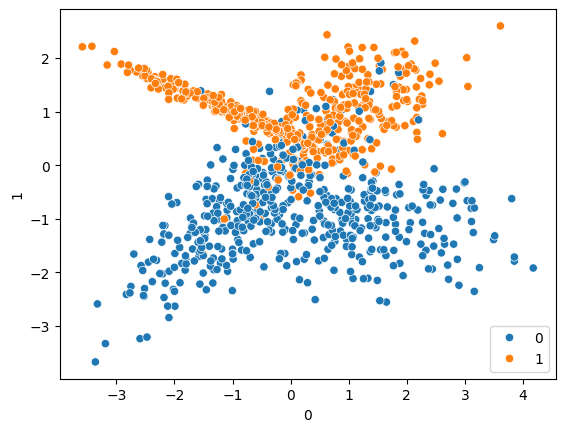

In [25]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [26]:
from sklearn.svm import SVC

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [28]:
svc=SVC(kernel='linear',C=1.0).fit(X_train,y_train)

In [29]:
## predicting the output of a given data using SVM
y_pred=svc.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_pred))

0.912


In [31]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       117
           1       0.89      0.95      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[102  15]
 [  7 126]]


In [32]:
rbf=SVC(kernel='rbf').fit(X_train,y_train)

In [33]:
y_pred1=rbf.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       117
           1       0.88      0.96      0.92       133

    accuracy                           0.91       250
   macro avg       0.91      0.90      0.91       250
weighted avg       0.91      0.91      0.91       250

[[ 99  18]
 [  5 128]]


In [35]:
score1=accuracy_score(y_test,y_pred1)

In [36]:
print(score1)

0.908


In [37]:
symoid=SVC(kernel='sigmoid').fit(X_train,y_train)
## prediction
y_pred2=symoid.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       117
           1       0.77      0.84      0.80       133

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

[[ 83  34]
 [ 21 112]]


## Hyperparameter tuning with GridSearchCV

In [38]:
## Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# defining parameters for grid search
param_grid = {'C': [0.1,1,10,100,1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [40]:
grid=GridSearchCV(SVC(), param_grid=param_grid,refit=True,n_jobs=-1,cv=5,verbose=3)

In [41]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [42]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [43]:
## prediction
y_pred2=grid.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91       117
           1       0.89      0.96      0.92       133

    accuracy                           0.92       250
   macro avg       0.92      0.91      0.92       250
weighted avg       0.92      0.92      0.92       250

[[101  16]
 [  5 128]]
